# Plotting MAPQ values from sam files

Purpose: This script will be used to create histograms of MAPQ values from Sam files after alignment to compare the plus DMS and minus DMS samples.

In [1]:
# Variables that store plus and minus sample name and the folder they are in within tmp folder
#plusSampleName="ShapeMapper1Parms_Bowtie2Alignment_Lela_MadrasinReadsTest_June2018/Mad-20mm-4hr-DMS_S2"
#minusSampleName="ShapeMapper1Parms_Bowtie2Alignment_Lela_MadrasinReadsTest_June2018/Mad-20mm-4hr-minus_S5"
plusSampleName="Lela_20uM_MadrasinReadsTest_August2018/Madrasin-20uM-4hr-Plus-1_S1"
minusSampleName="Lela_20uM_MadrasinReadsTest_August2018/Madrasin-20uM-4hr-Minus-1_S2"

In [2]:
%%bash -s "$plusSampleName" "$minusSampleName"
plusname=$1
minusname=$2
samtools view ../tmp/${plusname}.sam | cut -f5 > ../tmp/${plusname}_Aligned_MAPQscores.txt
samtools view ../tmp/${minusname}.sam | cut -f5 > ../tmp/${minusname}_Aligned_MAPQscores.txt

In [3]:
import pandas as pd

In [4]:
# Load R GGplots
%load_ext rpy2.ipython
%R require(ggplot2)
%R require(reshape)

/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: ggplot2

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: reshape

  warnings.warn(x, RRuntimeWarning)


array([1], dtype=int32)

In [5]:
# Get the plus data
plus = pd.read_csv("../tmp/"+plusSampleName+"_Aligned_MAPQscores.txt",header=None)
plus.columns = ["Plus DMS"]

In [6]:
# Melt the plus data
plus_melted = plus.melt(value_vars=["Plus DMS"])
plus_melted.columns = ["Sample","MAPQ"]
plus_melted.head()

,Sample,MAPQ
0,Plus DMS,44
1,Plus DMS,0
2,Plus DMS,40
3,Plus DMS,0
4,Plus DMS,9


In [7]:
# Get the minus data
minus = pd.read_csv("../tmp/"+minusSampleName+"_Aligned_MAPQscores.txt",header=None)
minus.columns = ["Minus DMS"]

In [8]:
# Melt the minus data
minus_melted = minus.melt(value_vars=["Minus DMS"])
minus_melted.columns = ["Sample","MAPQ"]
minus_melted.head()

,Sample,MAPQ
0,Minus DMS,44
1,Minus DMS,2
2,Minus DMS,42
3,Minus DMS,42
4,Minus DMS,41


In [9]:
# Concatenate the two data frames
data = pd.concat([plus_melted,minus_melted])
data.tail()

,Sample,MAPQ
574817,Minus DMS,25
574818,Minus DMS,1
574819,Minus DMS,1
574820,Minus DMS,12
574821,Minus DMS,12


In [10]:
sampleName="-".join(plusSampleName.split('/')[1].split('-')[0:3])
print sampleName
folderName=plusSampleName.split('/')[0]
print folderName

Madrasin-20uM-4hr
Lela_20uM_MadrasinReadsTest_August2018


[1] "../results/Lela_20uM_MadrasinReadsTest_August2018/GGplot2-FrequencyMAPQvalsPlusMinusDMS-Madrasin-20uM-4hr.png"


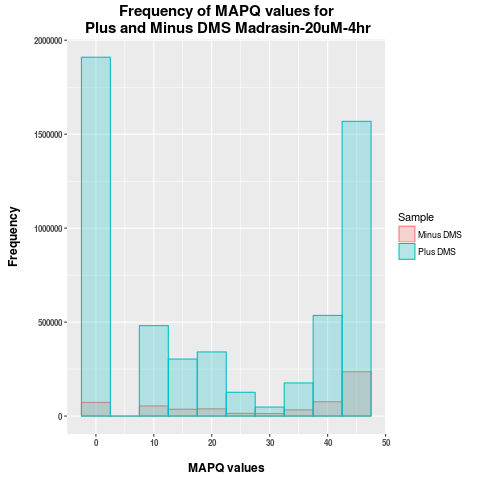

In [16]:
%%R -i data,sampleName,folderName
p<- ggplot(data, aes(x=MAPQ, fill=Sample, color=Sample)) +
  geom_histogram(alpha=0.25, binwidth=5,position="identity") +
    ggtitle(paste("Frequency of MAPQ values for\n Plus and Minus DMS",sampleName,sep=" ")) +
    xlab("\nMAPQ values") +
    ylab("Frequency\n") +
    theme(axis.title.x=element_text(face="bold",size=12),axis.title.y=element_text(face="bold",size=12),
          axis.text.x = element_text(face="bold",size=8),axis.text.y = element_text(face="bold",size=8),
         plot.title = element_text(face="bold",size=15))
filenameToSave = paste("../results/",folderName,"/GGplot2-FrequencyMAPQvalsPlusMinusDMS-",sampleName,".png",sep="")
print(filenameToSave)
ggsave(p,file=filenameToSave,width=8.1,height=5.6,dpi=300)
p

In [12]:
%%bash -s "$plusSampleName" "$minusSampleName"
plusname=$1
minusname=$2
samtools view ../tmp/${plusname}.sam | wc -l
samtools view -q 10 ../tmp/${plusname}.sam | wc -l
samtools view ../tmp/${minusname}.sam | wc -l
samtools view -q 10 ../tmp/${minusname}.sam | wc -l

5491028
3485342
574822
491443


In [18]:
3485342/5491028.0

0.634733969668339

In [19]:
491443/574822.0

0.8549481404678317